In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### **Phase 1: Data Collection and Preparation**

In [2]:
#1.1 Load the dataset into pandas Dataframe.
#url = "https://raw.githubusercontent.com/Naeema-cyber/dataset_sample/refs/heads/main/home_loan_train.csv"
path = r"C:\Users\Dell\Desktop\sample_datasets\dataset_sample\home_loan_train.csv"
home_loan = pd.read_csv(path)
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
home_loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
home_loan.shape

(614, 13)

In [5]:
home_loan.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


**1.2 Data inspection**

In [6]:
# Checking for the data type of Dependents
home_loan["Dependents"].unique

<bound method Series.unique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [7]:
home_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
# Checking the dataframe for missing values, duplicates, and data types inconsistencies.
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
home_loan.duplicated().sum()

np.int64(0)

In [10]:
# Checking for missing values
home_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
home_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Copying the data

df = home_loan.copy()

**1.3 Data cleaning**

In [13]:
 # Clean the dataset by handling missing values, correcting data types, and addressing outliers.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# setting the loan_ID column as index
df.set_index("Loan_ID", inplace=True)

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df["Credit_History"]

Loan_ID
LP001002    1.0
LP001003    1.0
LP001005    1.0
LP001006    1.0
LP001008    1.0
           ... 
LP002978    1.0
LP002979    1.0
LP002983    1.0
LP002984    1.0
LP002990    0.0
Name: Credit_History, Length: 614, dtype: float64

In [17]:
# Changing the data type of credit history and loan amount type to string
df["Credit_History"] = df["Credit_History"].astype(str)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str)

In [18]:
df['Credit_History'] = df['Credit_History'].map({'1.0':'good', '0.0': 'bad'})

In [19]:
# Correcting the data type of ApplicantIncome from int64 to float64
df["ApplicantIncome"] = df["ApplicantIncome"].astype(float)

In [20]:
# Handle the missing values in the dataset
# Create dictionaries to store the fill values for each group of columns
num_cols = df.select_dtypes(include=["number"]).columns
num_cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].median()
cat_cols = df[['Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents', 'Self_Employed']].mode().iloc[0]
# Combine the dictionaries into a single dictionary for `fillna()`
fill_values = num_cols.to_dict()
fill_values.update(cat_cols.to_dict())
# Fill the missing values in one call
df= df.fillna(value=fill_values)

In [21]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Addressing the outliers

# numeric columns with outliers

num_cols = df.select_dtypes(include=['number']).columns.values


outlier_summary = []

for i in num_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((df[i] < lower) | (df[i] > upper)).sum()
    total = df[i].shape[0]
    perc = (outlier_count / total) * 100
    outlier_summary.append({'Feature': i, 'Outliers': outlier_count, 'Percentage': perc})

outlier_df = pd.DataFrame(outlier_summary).sort_values(by='Outliers', ascending=False)
print(outlier_df)



             Feature  Outliers  Percentage
0    ApplicantIncome        50    8.143322
2         LoanAmount        41    6.677524
1  CoapplicantIncome        18    2.931596


In [25]:
# IQR Capping (Winsorization)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Cap values outside the bounds
    df[col] = np.where(df[col] < lower, lower,
                     np.where(df[col] > upper, upper, df[col]))
    
    


In [26]:
# IQR-based check AFTER capping
iqr_out_counts_new = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_out_counts_new[col] = ((df[col] < lower) | (df[col] > upper)).sum()
iqr_out_counts_new = pd.Series(iqr_out_counts_new)
print("\nOutlier counts by column AFTER capping (IQR rule):")
print(iqr_out_counts_new[iqr_out_counts_new > 0] if iqr_out_counts_new.sum() > 0 else "No IQR outliers detected")



Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [27]:
# Compare with previous IQR counts if available
if 'iqr_out_counts' in globals():
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    print("\nComparison of IQR outlier counts (before vs after capping):")
    display(compare_iqr)
else:
    print("No previous IQR outlier counts found.")

No previous IQR outlier counts found.


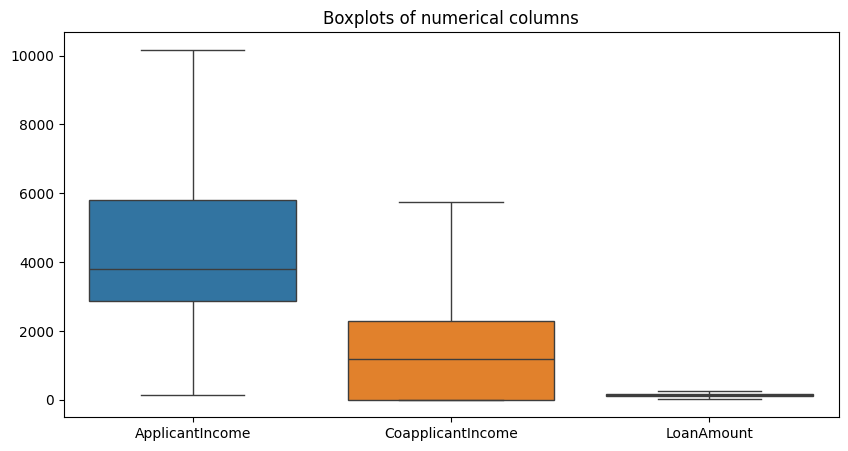

In [37]:
#Boxplot visualization for numeric columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of numerical columns")
plt.show()

In [41]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype(float)

### **Phase 2: Exploratory Data Analysis (EDA)**

**Task 2.1:** Conduct descriptive statistics to summarize the key characterisitics of the data

In [28]:
# 2.1
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4617.111564,2479.851729,150.0,2877.50,3812.5,5795.00,10171.250
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,137.365635,55.779749,9.0,100.25,128.0,164.75,261.500


##### **Univariate Analysis**

In [29]:

num_features = df.select_dtypes(include=['float64', 'int64']).columns

def univariate_numerical_eda(df, column):
    """
    This code performs univariate anaylysis on each numerical column.
    displays summary statistics, skewness, kurtosis, histogram, KDE, and pie chart.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.111564
std        2479.851729
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.250000

Skewness: 1.040
Kurtosis: 0.126


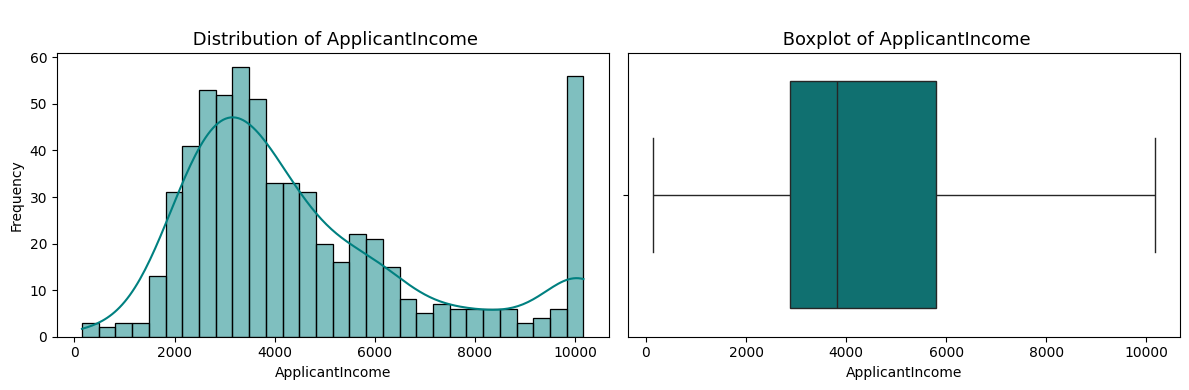


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


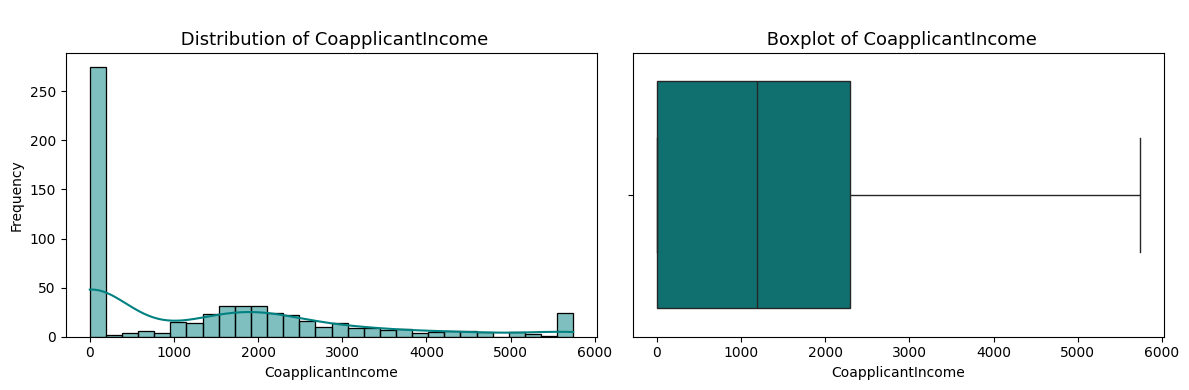


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000

Skewness: 0.684
Kurtosis: 0.112


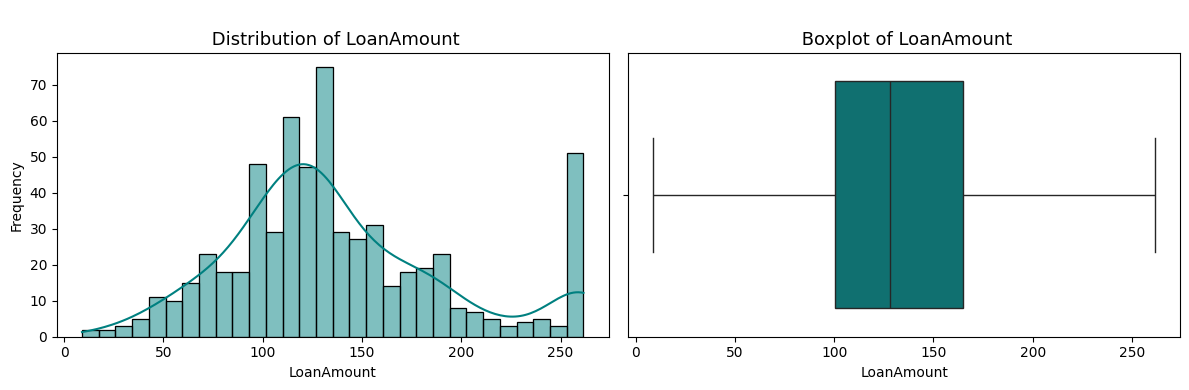

LoanAmount is moderately skewed.


In [30]:
# We can loop to save time
for col in num_features:
    univariate_numerical_eda(df, col)

In [42]:
categorical_columns = df.select_dtypes(include='object').columns

In [ ]:

def univariate_categorical_analysis(df, col):
    # Frequency and percentage
    distribution = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Counts': distribution, 'Percentage (%)': percentage.round(2)})
    
    print(f"--- {col} Distribution ---\n")
    print(summary)
    print("\n")

    # Set up the figure
    plt.figure(figsize=(12, 5))

    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)
    plt.title(f"Distribution (Bar Chart) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2", len(distribution))
    )
    plt.title(f"Distribution (Pie Chart) of {col}", fontsize=13)
    plt.ylabel("")  # Remove y-label for better layout

    plt.tight_layout()
    plt.show()


--- Gender Distribution ---

        Counts  Percentage (%)
Gender                        
Male       502           81.76
Female     112           18.24




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


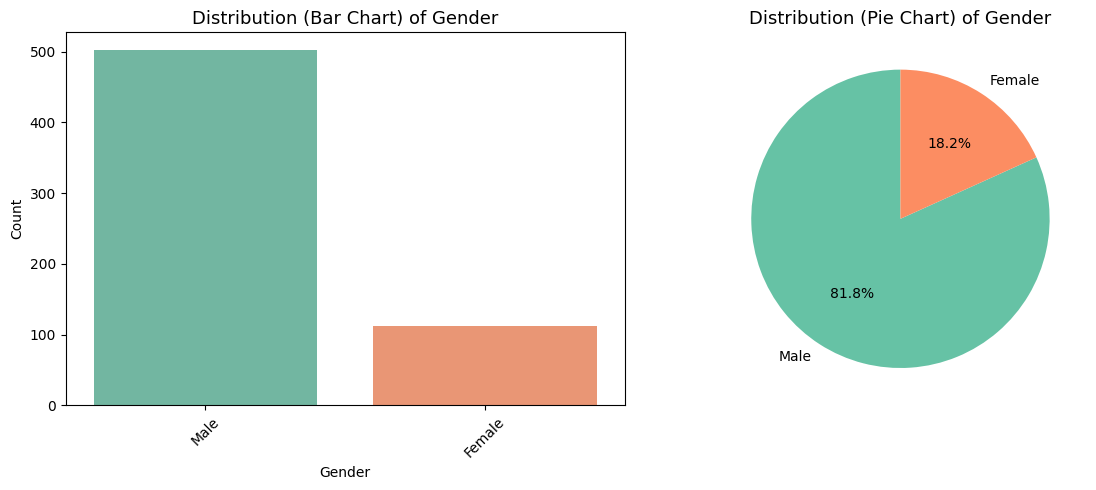

--- Married Distribution ---

         Counts  Percentage (%)
Married                        
Yes         401           65.31
No          213           34.69




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


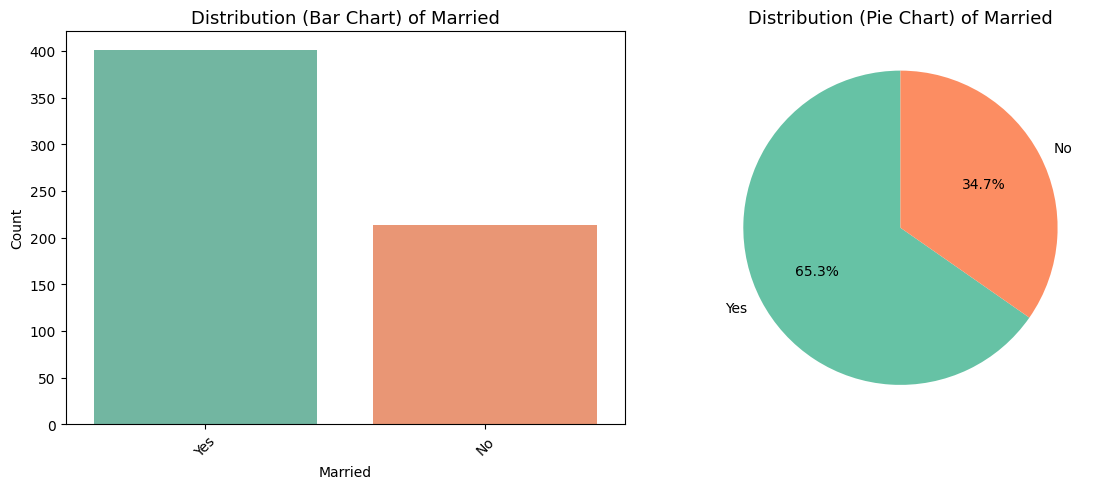

--- Dependents Distribution ---

            Counts  Percentage (%)
Dependents                        
0              360           58.63
1              102           16.61
2              101           16.45
3+              51            8.31




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


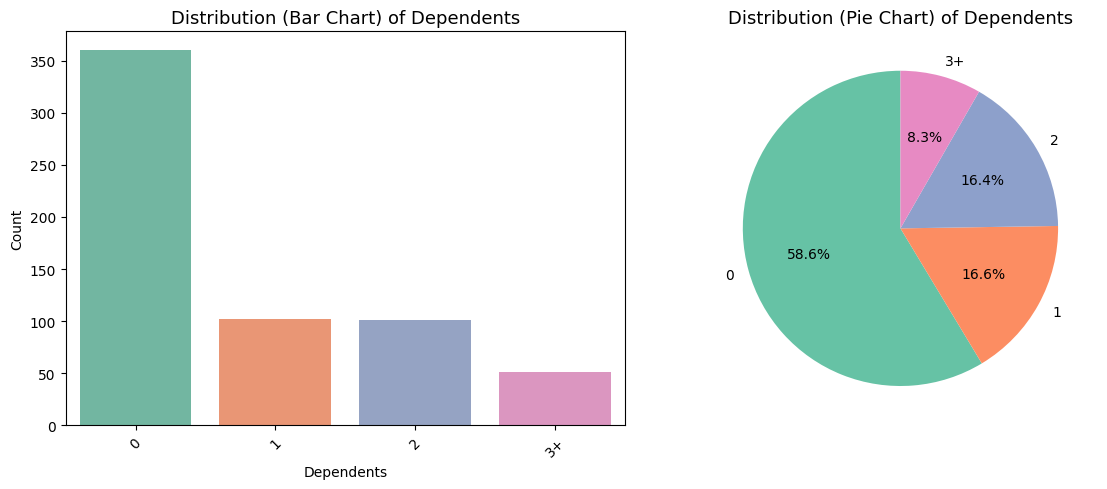

--- Education Distribution ---

              Counts  Percentage (%)
Education                           
Graduate         480           78.18
Not Graduate     134           21.82




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


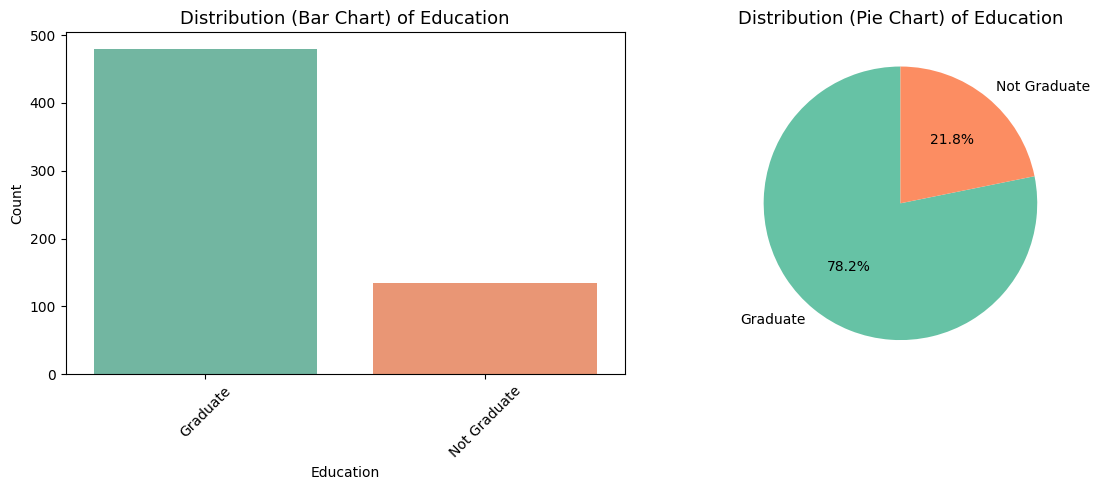

--- Self_Employed Distribution ---

               Counts  Percentage (%)
Self_Employed                        
No                532           86.64
Yes                82           13.36




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


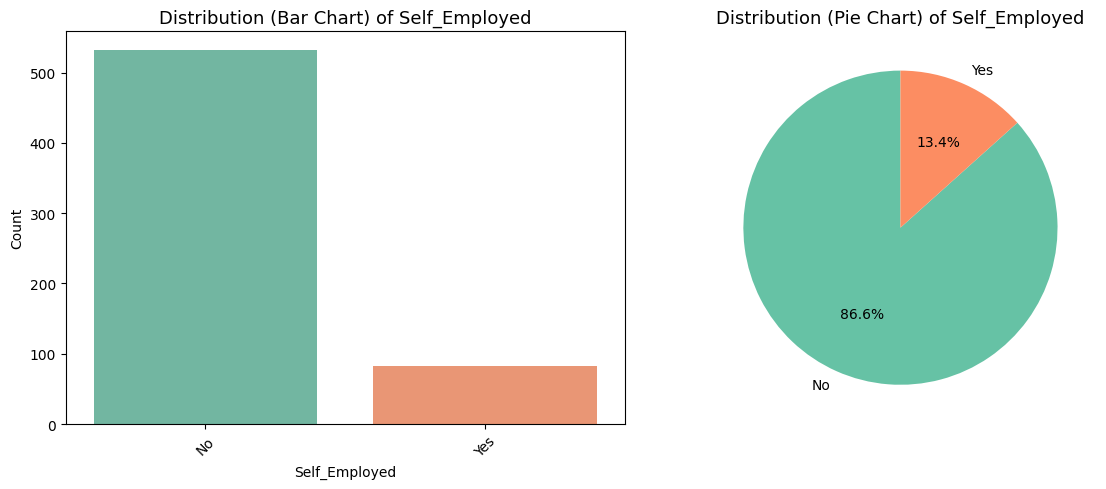

--- Credit_History Distribution ---

                Counts  Percentage (%)
Credit_History                        
good               525            85.5
bad                 89            14.5




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


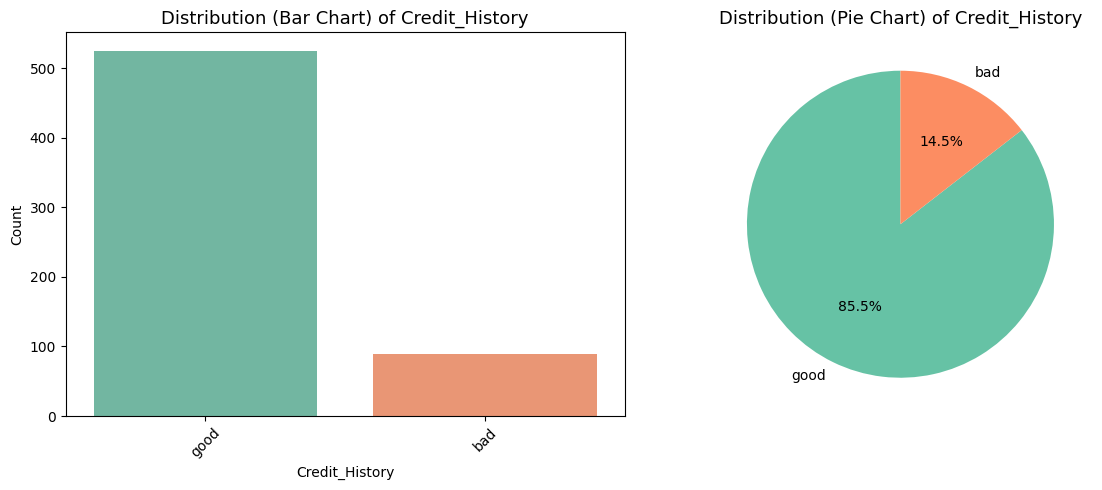

--- Property_Area Distribution ---

               Counts  Percentage (%)
Property_Area                        
Semiurban         233           37.95
Urban             202           32.90
Rural             179           29.15




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


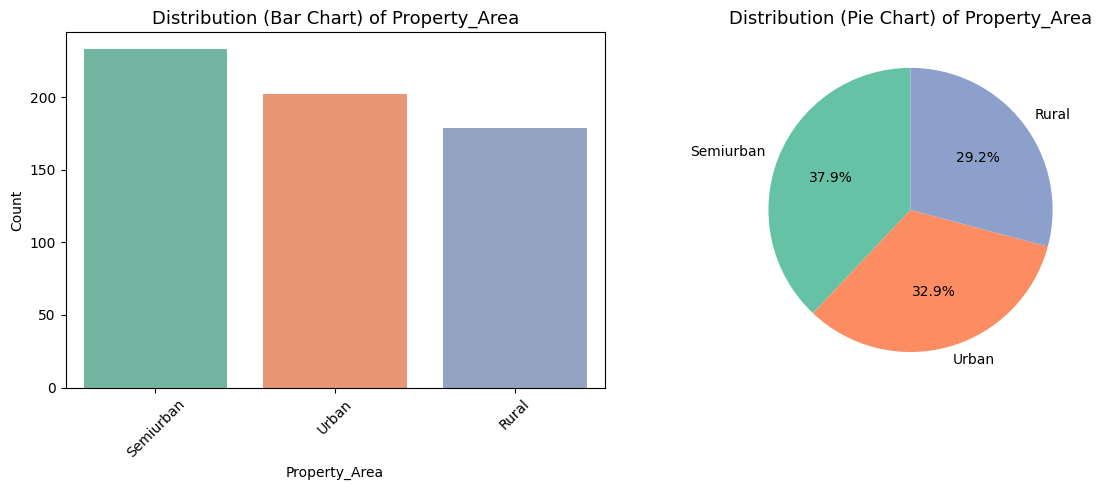

--- Loan_Status Distribution ---

             Counts  Percentage (%)
Loan_Status                        
Y               422           68.73
N               192           31.27




C:\Users\Dell\AppData\Local\Temp\ipykernel_7736\689262138.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


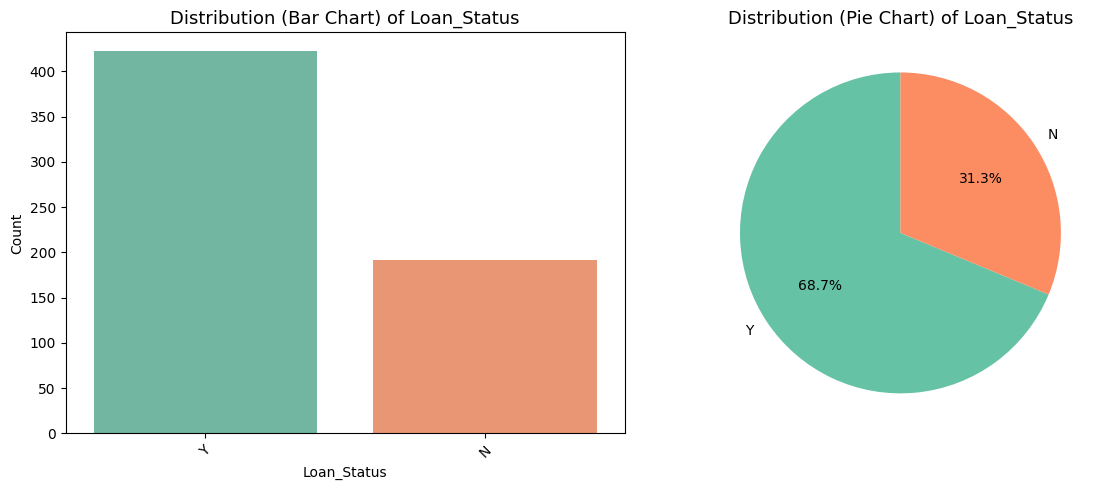

In [53]:
for cols in categorical_columns:
    univariate_categorical_analysis(df, cols)

##### **Bivariate analysis**

In [31]:
#  Numeric Correlation with target columns

def correlation_and_histograms(df, target_col, top_n=3, bins=20):
    """
    Plots correlation heatmap and histograms for top correlated numeric features.
    Works even if target column is categorical.
    """
    # Check if target column exists
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame.")

    # Copy dataframe
    df_copy = df.copy()

    # If target is categorical, encode it numerically
    if df_copy[target_col].dtype == 'object' or df_copy[target_col].dtype.name == 'category':
        print(f" Target column '{target_col}' is categorical — encoding to numeric.")
        df_copy[target_col] = df_copy[target_col].astype('category').cat.codes

    # Select numeric columns (including encoded target)
    numeric_columns = df_copy.select_dtypes(include='number').copy()

    # Compute correlations
    corrs = numeric_columns.corrwith(numeric_columns[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T

    # --- Plot correlation heatmap ---
    plt.figure(figsize=(10, 2))
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink': 0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with '{target_col}'", fontsize=12)
    plt.tight_layout()
    plt.show()

    # --- Select top correlated features ---
    top_features = corrs.abs().sort_values(ascending=False).head(top_n).index

    # --- Plot histograms for top correlated features ---
    for col in top_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(
            data=df,
            x=col,
            hue=target_col,
            bins=bins,
            kde=True,
            palette='Set2',
            element='step'
        )
        plt.title(f"Distribution of '{col}' by {target_col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    # Return sorted correlation values
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


 Target column 'Loan_Status' is categorical — encoding to numeric.


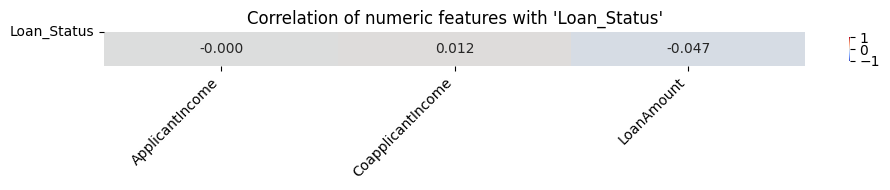

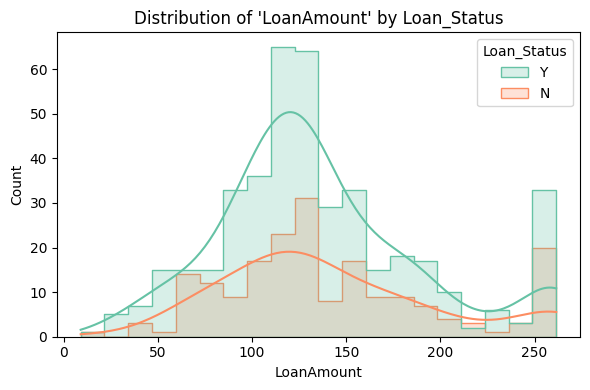

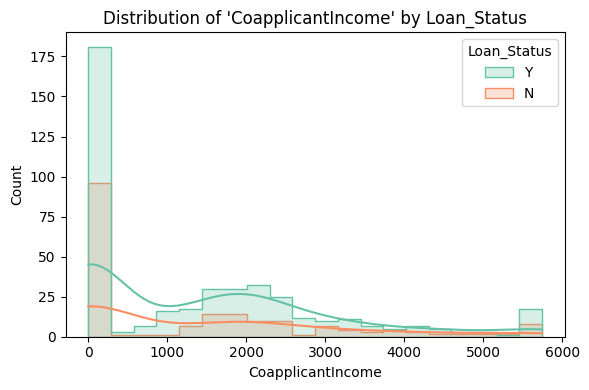

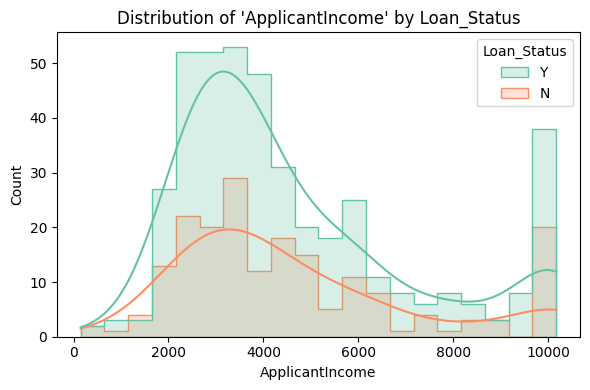

LoanAmount          -0.047262
CoapplicantIncome    0.011983
ApplicantIncome     -0.000442
dtype: float64


In [32]:
correlations = correlation_and_histograms(df, "Loan_Status")
print(correlations)


In [33]:


def numeric_feature_analysis(df, top_n=5):
    """
    Performs EDA for numeric vs numeric features.
    Includes correlation heatmap, pairplot, and color-coded scatterplots.
    """

    # --- Select numeric columns ---
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if len(numeric_columns) < 2:
        raise ValueError("Need at least two numeric columns for correlation analysis.")

    df_numeric = df[numeric_columns].copy()

    # --- Compute correlation matrix ---
    corr_matrix = df_numeric.corr().round(2)

    # --- Plot correlation heatmap ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        linewidths=0.5
    )
    plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- Identify top correlated pairs ---
    corr_pairs = (
        corr_matrix.unstack()
        #.drop_duplicates()
        .sort_values(ascending=False)
    )



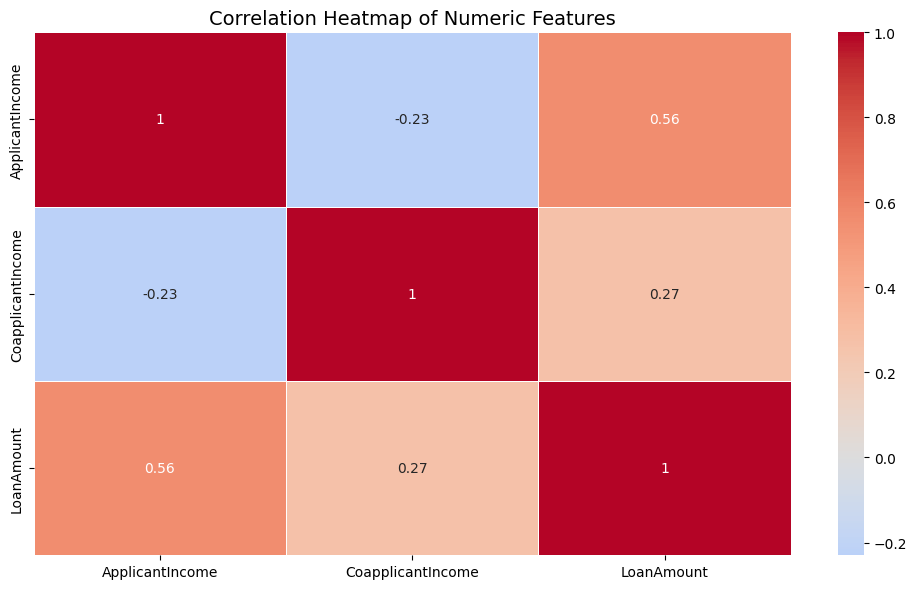

In [34]:
top_corr_pairs = numeric_feature_analysis(df, top_n=5)


In [35]:
def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


In [36]:
bivariate_analysis = numeric_bivariate_plot(df, 'Credit_History', 'LoanAmount')

AttributeError: 'numpy.dtypes.ObjectDType' object has no attribute 'dtype'

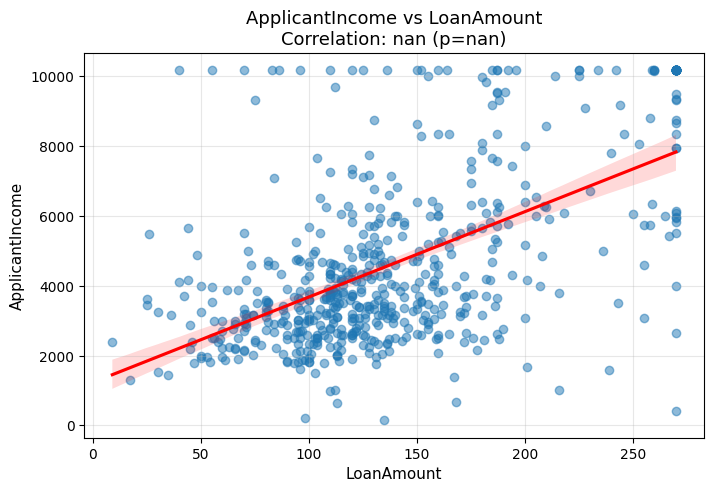

In [ ]:
numeric_bivariate_plot(df, 'LoanAmount', 'ApplicantIncome')

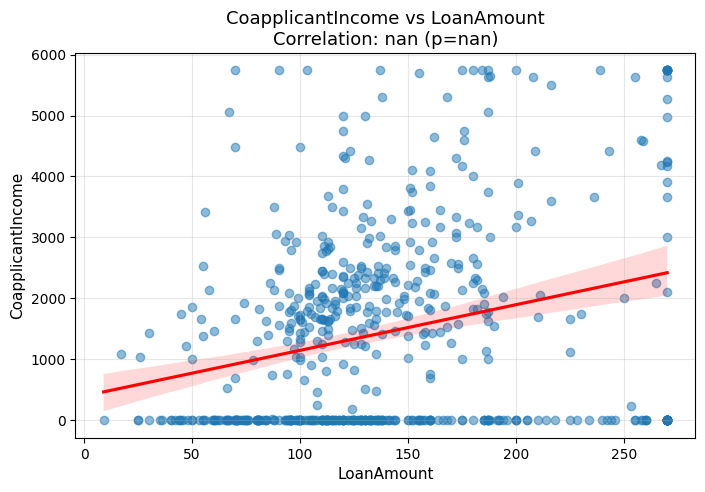

In [ ]:
numeric_bivariate_plot(df, 'LoanAmount', 'CoapplicantIncome')

In [ ]:
# 2.2
# Let's visualize the distributions of the numerical features using histogram and box plots.
def correlation_with_target(df, target_col, figsize=(10,2)):
    numeric_columns = df.select_dtypes(include='number').copy()
    if target_col not in numeric_columns.columns:
        raise ValueError(f"Target column '{target_col}' must be present in the dataframe.")
    corrs = numeric_columns.corrwith(numeric_columns[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}    
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

c:\Users\Dell\Desktop\ai_engineering_repo\my_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Dell\Desktop\ai_engineering_repo\my_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


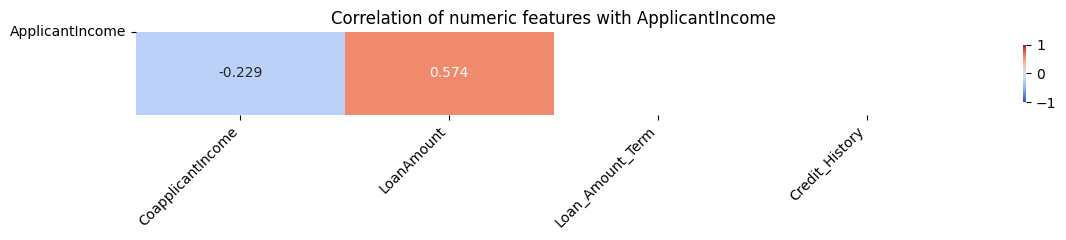

LoanAmount           0.573764
CoapplicantIncome   -0.228956
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64


In [ ]:
corr_series = correlation_with_target(df, 'ApplicantIncome', figsize=(12,2.5))
print(corr_series)

From the graph above, we can see that only CoApplicantIncome and LoanAmount are the only ones that are correlated with the ApplicantIncome.

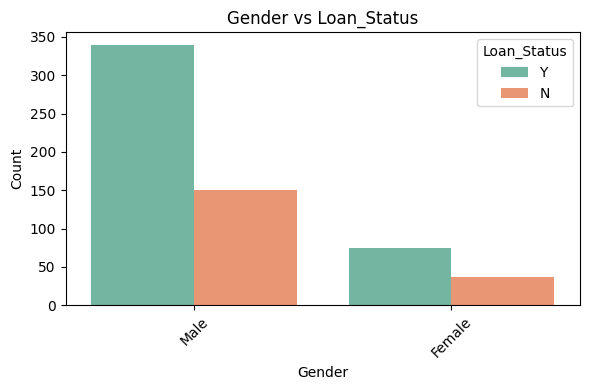

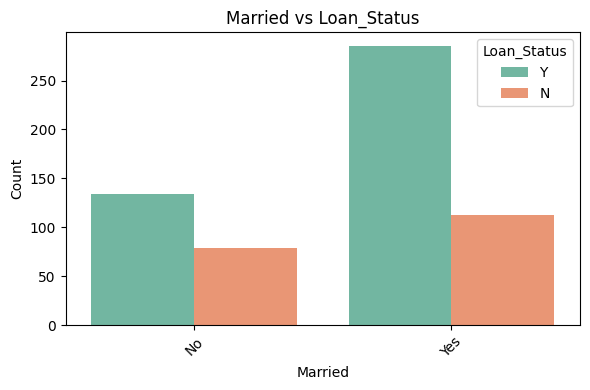

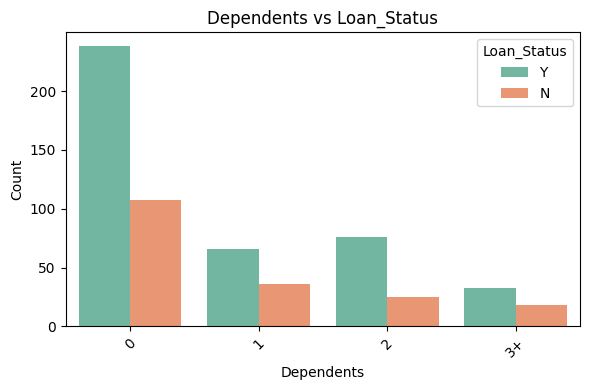

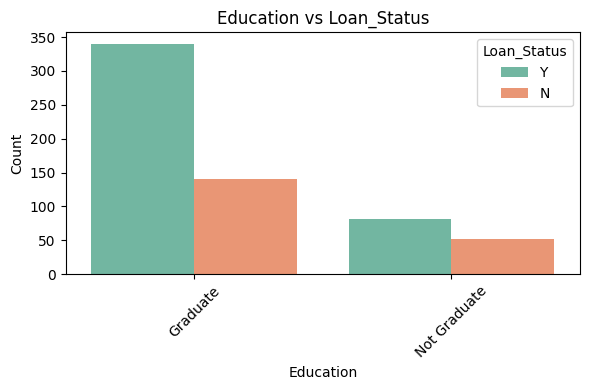

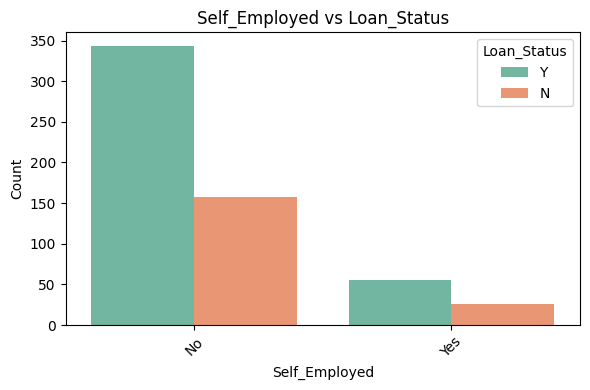

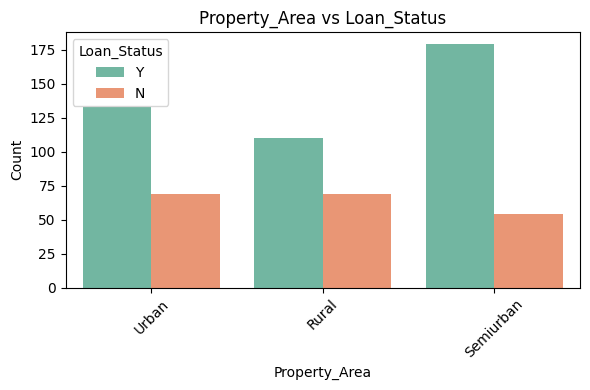

In [ ]:
# 2.3
# Analyze categorical features(e.g education, employment status, property area using bar charts and pie charts).
categorical_features = df.select_dtypes(include='object').copy()
target = 'Loan_Status'

for col in categorical_features:
    if col not in ['Loan_ID', target]:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue=target, data=df, palette='Set2')
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


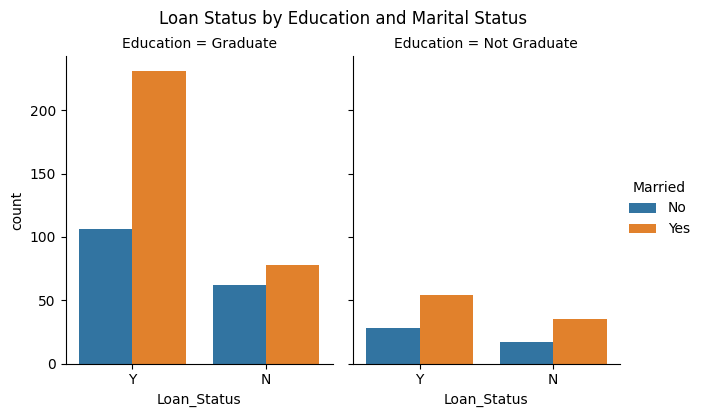

In [ ]:
#Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.


g = sns.catplot(x='Loan_Status', hue='Married', col='Education',
                data=df, kind='count', height=4, aspect=0.8)
g.fig.suptitle('Loan Status by Education and Marital Status', y=1.03)
plt.show()


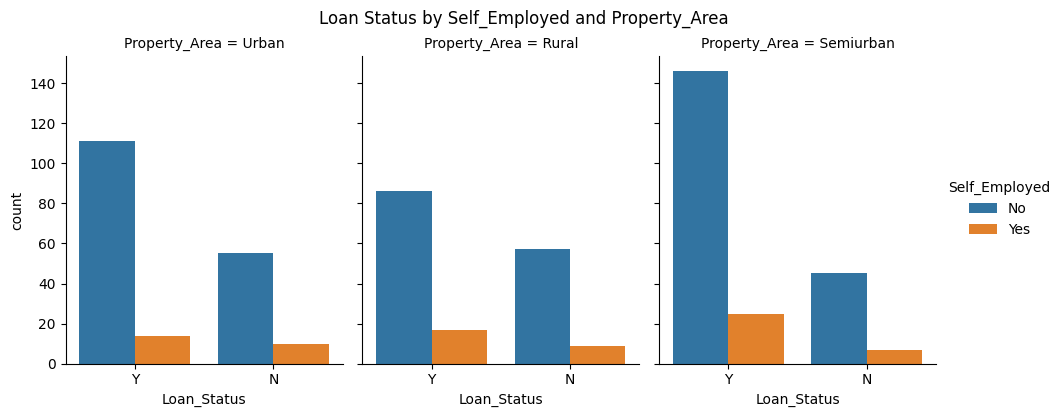

In [ ]:
g = sns.catplot(x='Loan_Status', hue='Self_Employed', col='Property_Area',
                data=df, kind='count', height=4, aspect=0.8)
g.fig.suptitle('Loan Status by Self_Employed and Property_Area', y=1.03)
plt.show()

#### Phase 3: Reporting and Insights

- 3.1: Summarize key findings and insights derived from the EDA.
From the EDA done above, we can deduce the following things from them:
_ 
